# Visualization With Matplotlib
本文特点：
- 无基础内容，重应用与展示
- 代码为主
- 回看使用

> 写在前面. 几乎每个编写Python-DataScience的教材提到Matplotlib时都会解释一个问题**Why Matplotlib**。 因为目前Python可视化的技术生态非常活跃，日新月异，而Matplotlib这一风格不那么“时尚”的库逐渐被人诟病。
但正如每个领域的先驱总要革新一样，Matplotlib 的设计思想可以让我略微了解数据可视化最初设计时的那一套理论，Matplotlib致敬Matlab,激发了更多Pythonist与时俱进开发出更多优秀的可视化库。

更多可视化库：
- Bokeh(Json 交互)
- Plotly(前端渲染)
- Vega
- Vispy
- Mayavi(擅长3d)
- PyEcharts(Echarts 的Python接口，国产良心)
...

工具没有最好的，只有最适合的，而Matplotlib不论怎样，都是入门学习的不二之选;因为他是仅剩不多的还保持这OO（Object-Oriented）编程风格的可视化库了。

In [1]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

## Contour 

In [2]:
import numpy as np
X = np.linspace(0,5,50)
Y = np.linspace(0,5,40)

In [3]:
X,Y = np.meshgrid(X,Y)
def fun(x,y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
Z = fun(X,Y)

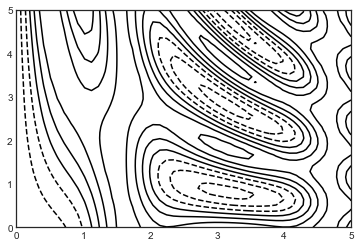

In [4]:
fig,ax = plt.subplots()
ax.contour(X,Y,Z,colors = 'black') # 注意colors 参数
plt.show()

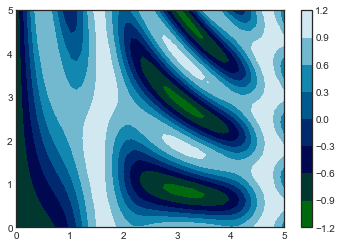

In [5]:
# fig, ax2 = plt.subplots()
# plt.contourf(X,Y,Z,cmap = 'RdGy')
plt.contourf(X,Y,Z,cmap = 'ocean')
plt.colorbar()
plt.show()

## Histgrams, Binnings and Density

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


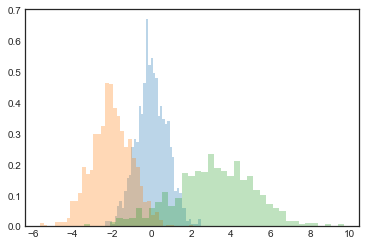

In [6]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
# kwargs = dict(histtype='stepfilled', alpha=0.3, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)
plt.show()

In [7]:
# 参数查看方法
data = np.random.randn(1000)
counts, bin_edges = np.histogram(data,bins =5)
counts, bin_edges

(array([ 19, 171, 464, 292,  54], dtype=int64),
 array([-3.42825438, -2.14676267, -0.86527097,  0.41622073,  1.69771244,
         2.97920414]))

In [8]:
# 二维histgrams
mean = [0,0]
cov = [[1,1],[1,2]]
x,y = np.random.multivariate_normal(mean,cov,1000).T

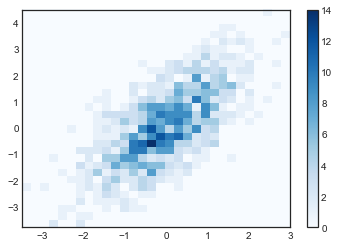

In [9]:
plt.hist2d(x,y,bins= 30,cmap = 'Blues')
plt.colorbar()
plt.show()

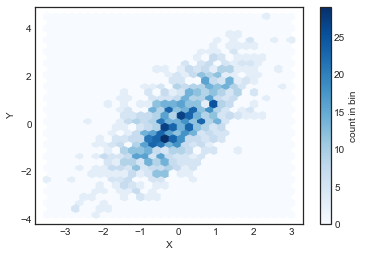

In [10]:
# 更自然的六边形镶嵌形式
plt.hexbin(x,y,gridsize = 30,bins = 30,cmap = 'Blues')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label = 'count in bin')
plt.show()

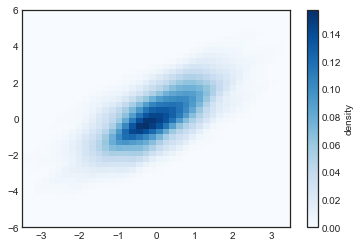

In [11]:
# 估计样本分布的KDE方法
from scipy.stats import  gaussian_kde
data = np.vstack([x,y])
kde = gaussian_kde(data)

# 估计一张网格
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)

# evaluate on a regular grid
Z = kde.evaluate(np.vstack([Xgrid.ravel(),Ygrid.ravel()]))

plt.imshow(Z.reshape(Xgrid.shape),origin='lower', aspect='auto',extent=[-3.5, 3.5, -6, 6],cmap='Blues')
cb = plt.colorbar()
cb.set_label("density")
plt.show()

## Cutomizing Legends
自定义图例

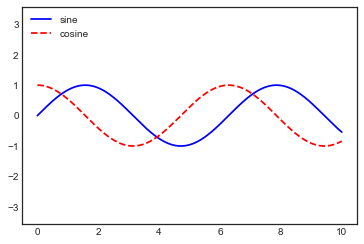

In [12]:
x = np.linspace(0,10,1000)
y = np.linspace(0,10,1000)
fig ,ax = plt.subplots()
plt.style.use('seaborn')
ax.plot(x,np.sin(x),'-b',label = 'sine')
ax.plot(y,np.cos(y),'--r',label = 'cosine')
ax.axis('equal')
ax.legend(loc = 'upper left',frameon = False)
plt.show()

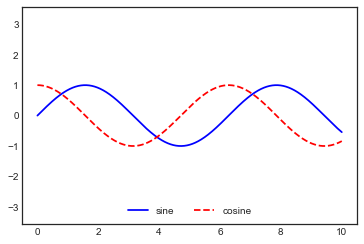

In [13]:
# 指定行数
ax.legend(loc=  'lower center',ncol = 2,frameon = False)
fig

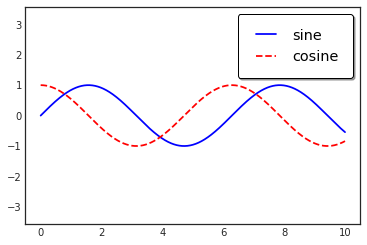

In [14]:
# 制定box
plt.style.use('classic')
ax.legend(fancybox = True,framealpha = 1, shadow = True, borderpad= 1)
fig

D:\Anaconda\lib\site-packages\matplotlib\collections.py:902: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


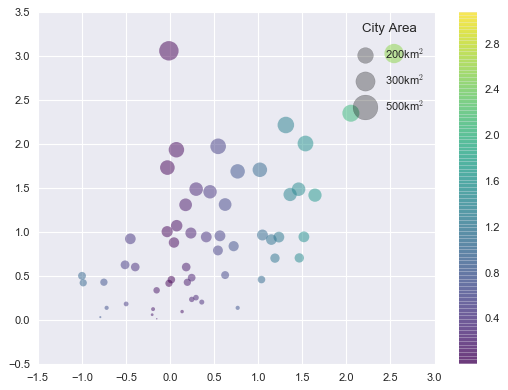

In [15]:
# Legend For Size of Points
mean = [0,0]
cov = [[1,1],[1,2]]
plt.style.use('seaborn')
x,y = np.random.multivariate_normal(mean,cov,100).T
plt.scatter(x,y,s = y*100,c=np.abs(x),cmap='viridis', linewidth=0, alpha=0.5)
plt.colorbar()

for size in [200,300,500]:
    plt.scatter([],[],s= size,c = 'k',alpha = 0.3, label= str(size) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False,labelspacing=1, title='City Area')

plt.show()

## Customizing Colorbars

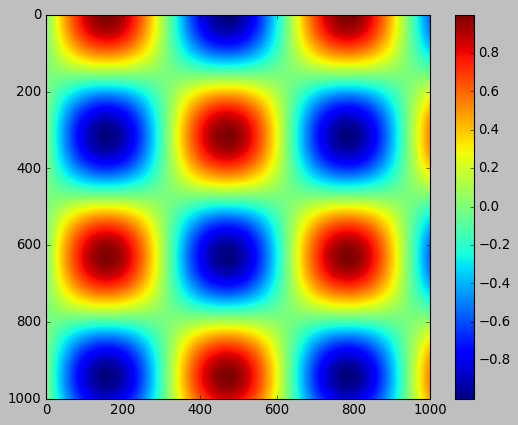

In [16]:
x = np.linspace(0,10,1000)
I = np.sin(x) * np.cos(x[:,np.newaxis])
# I.shape
# np.sin(x).shape, x[:,np.newaxis].shape
plt.style.use('classic')
plt.imshow(I)
plt.colorbar()
plt.show()

**在这里插一句题外话，突然发现了不得了的东西：(1000,)× (1000,1) -->(1000,1000) .....**

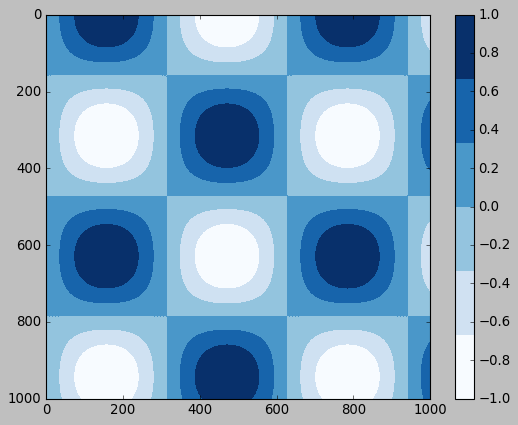

In [17]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6)) # 离散的颜色值，分为6段；如果不定义的话则是连续的颜色值
# plt.imshow(I,cmap = 'Blues')
plt.colorbar()
plt.clim(-1, 1);
plt.show()

## ColorBar Applyinng Example: Digital Numbers

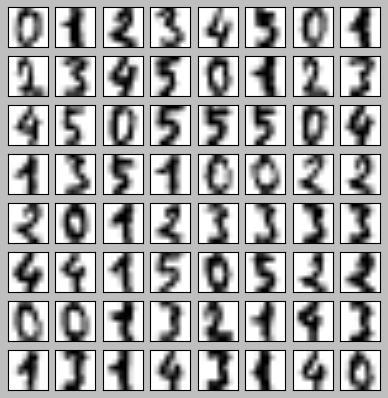

In [18]:
from sklearn.datasets import load_digits
digits = load_digits(n_class = 6)

fig, ax = plt.subplots(8,8,figsize = (6,6))
for i,axi in enumerate(ax.flat):
    axi.imshow(digits.images[i],cmap = 'binary')
    axi.set(xticks = [],yticks = [])
plt.show()

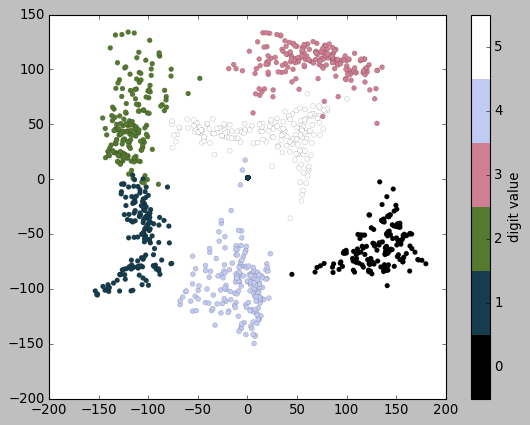

In [19]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

plt.scatter(projection[:, 0], projection[:, 1], lw=0.1,c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.clim(-0.5, 5.5)
plt.show()

## Multiple subplots

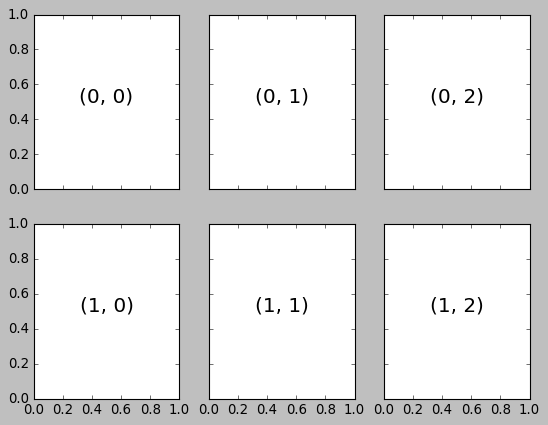

In [20]:
# 这部分不多讲，列几个不熟悉的
# sharex 和 sharey参数
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row') 
for i in range(2):
    for j in range(3):
        ax[i,j].text(0.5,0.5,str((i,j)),fontsize= 18,ha = 'center')
plt.show()

## Cutomizing Ticks 
再次回顾matplotlib的层级关系：figure --> axes -->axis

We can customize these tick properties—that is, locations and labels—by setting the
formatter and locator objects of each axis.

如果想隐藏ticks 可以使用ax.xaxis.set_major_locator(plt.NullLocator())

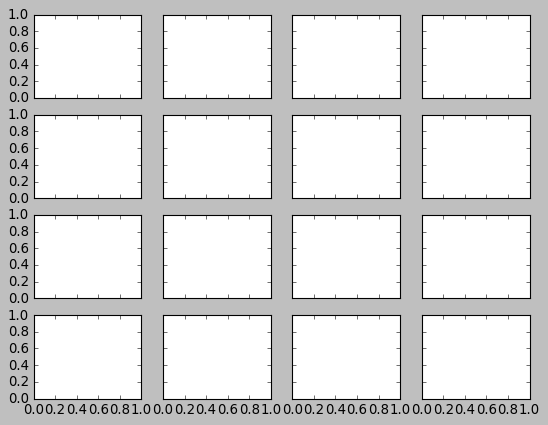

In [21]:
# Reducing or Increasing the Number of Ticks
fig, ax = plt.subplots(4, 4, sharex=True, sharey=True)
fig
# 这是正常的默认图，可以看到tick太过于密集

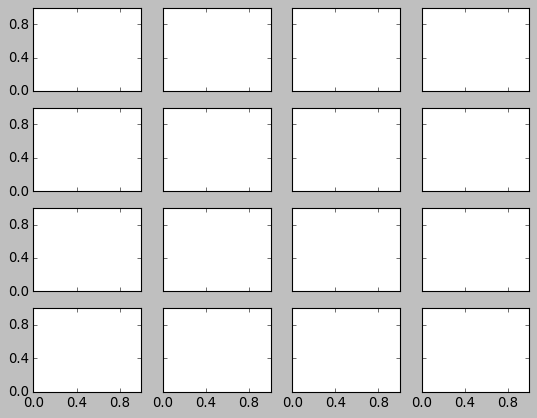

In [22]:
for axi in ax.flat:
    axi.xaxis.set_major_locator(plt.MaxNLocator(3))
    axi.yaxis.set_major_locator(plt.MaxNLocator(3))
plt.show()

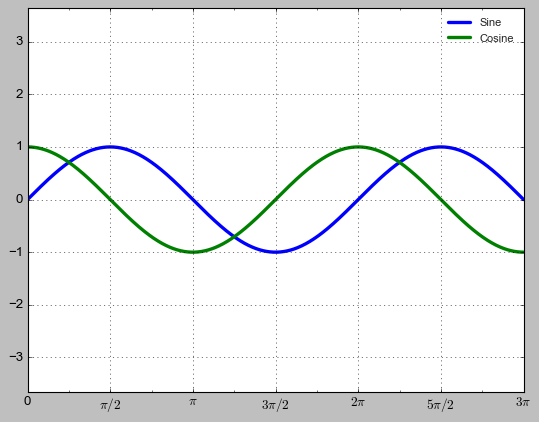

In [23]:
# Fancy Formatter
# Plot a sine and cosine curve
fig, ax = plt.subplots()
plt.style.use('seaborn')
x = np.linspace(0, 3 * np.pi, 1000)
ax.plot(x, np.sin(x), lw=3, label='Sine')
ax.plot(x, np.cos(x), lw=3, label='Cosine')
# Set up grid, legend, and limits
ax.grid(True)
ax.legend(frameon=False)
ax.axis('equal')
ax.set_xlim(0, 3 * np.pi)

# 转移坐标位置到Pi
ax.xaxis.set_major_locator(plt.MultipleLocator(np.pi / 2))
ax.xaxis.set_minor_locator(plt.MultipleLocator(np.pi / 4))

# 自定义tick格式
def format_fun(value,tick_number):
    N = int(np.round(2*value / np.pi))
    if N ==0:
        return '0'
    elif N == 1:
        return r"$\pi/2$"
    elif N == 2:
        return r"$\pi$"
    elif N % 2 > 0:
        return r"${0}\pi/2$".format(N)
    else:
        return r"${0}\pi$".format(N // 2)
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_fun))
plt.show()

## Three-Dimentional Plotting in Matplotlib

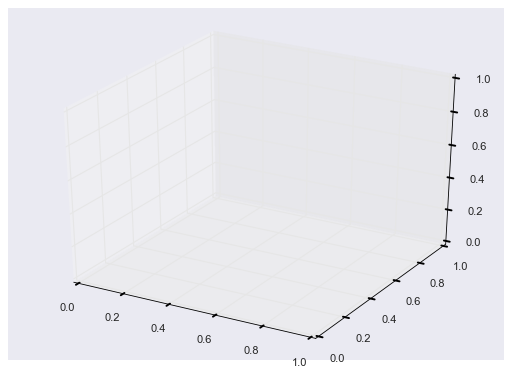

In [24]:
from mpl_toolkits import  mplot3d
fig = plt.figure()
ax = plt.axes(projection = '3d')
plt.show()

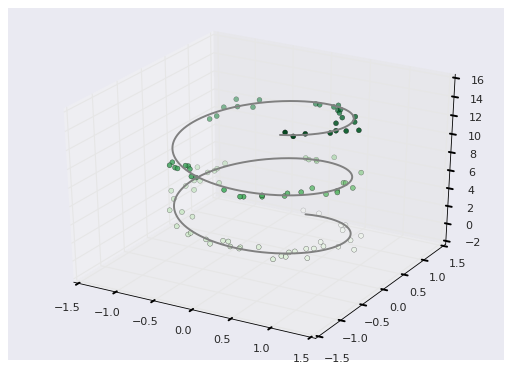

In [25]:
# Data for a three-dimensional line
ax = plt.axes(projection = '3d')
zline = np.linspace(0, 15, 1000)
xline = np.sin(zline)
yline = np.cos(zline)
ax.plot3D(xline, yline, zline, 'gray')
# Data for three-dimensional scattered points
zdata = 15 * np.random.random(100)
xdata = np.sin(zdata) + 0.1 * np.random.randn(100)
ydata = np.cos(zdata) + 0.1 * np.random.randn(100)
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens')
plt.style.use('classic')
plt.show()

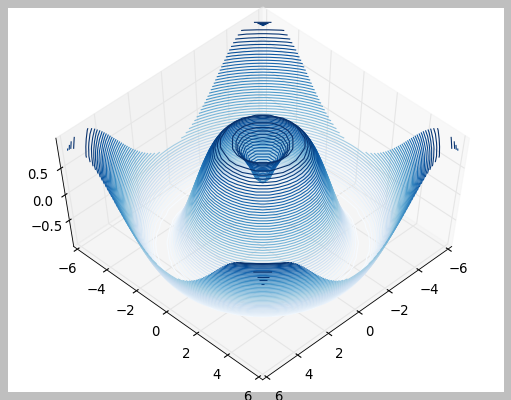

In [26]:
x = np.linspace(-6,6,30)
y = np.linspace(-6,6,30)

X, Y = np.meshgrid(x,y)

def func(x,y):
    return np.sin(np.sqrt(x**2 + y**2))
Z = func(X,Y)

ax = plt.axes(projection ='3d')
ax.contour3D(X,Y,Z,50,cmap='Blues')
ax.view_init(60,45) # 调整观察的视角和方位角
plt.show()

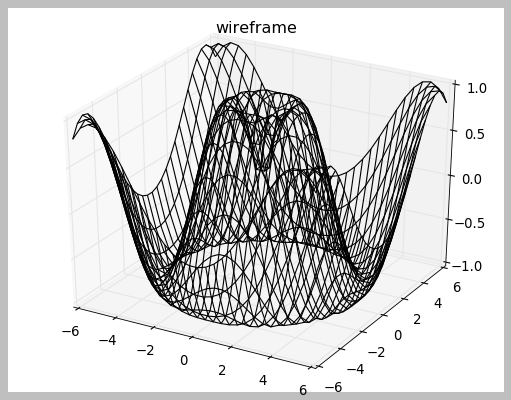

In [27]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_wireframe(X, Y, Z, color='black')
ax.set_title('wireframe');
plt.show()

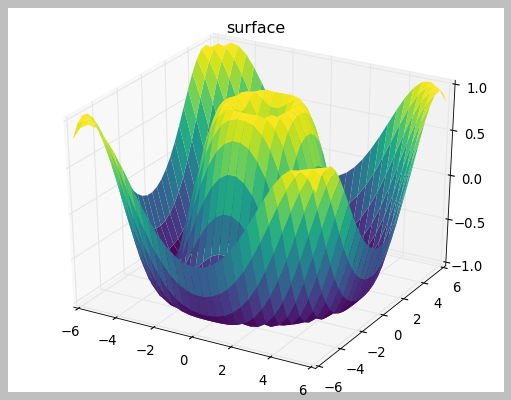

In [28]:
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='viridis', edgecolor='none')
ax.set_title('surface');
plt.show()

## Geographic Data With Basemap
basemap 安装出现问题。 Python的地图绘制方案后续另2外讨论

## Visiualization With Seaborn

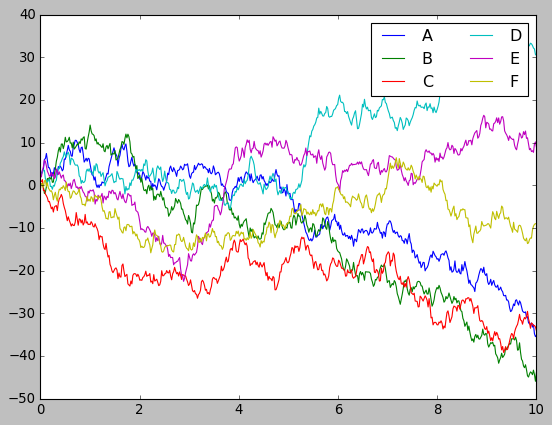

In [37]:
rng = np.random.RandomState(0)
x = np.linspace(0,10,500)
y = np.cumsum(rng.randn(500,6),0)
plt.plot(x,y)
plt.legend('ABCDEF',ncol =2)
plt.show()
# 传统的Matplotlib绘出的图颇有上世纪的风韵hhhh

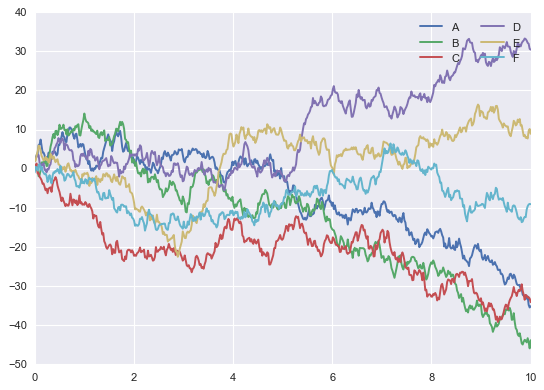

In [40]:
import seaborn as sns
sns.set()
# plt.style.use('seaborn')
plt.plot(x,y)
plt.legend('ABCDEF',ncol =2)
plt.show()

D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


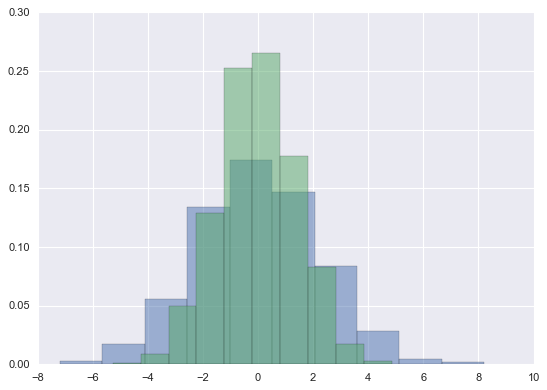

In [49]:
# Histgrame and KDE in Seaborn
data = np.random.multivariate_normal([0,0],[[5,2],[2,2]],2000)
import pandas as pd
df = pd.DataFrame(data = data, columns = ['x','y'])
for x in 'xy':
    plt.hist(df[x],normed = True,alpha = 0.5)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


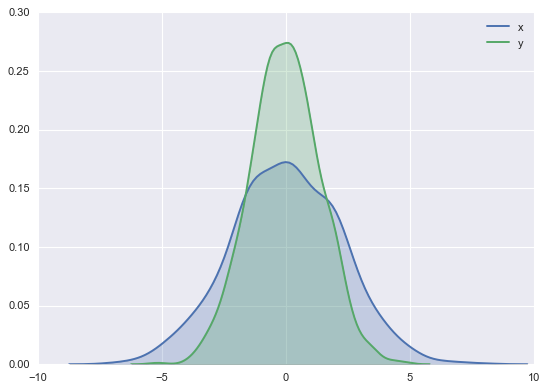

In [52]:
# kde
for col in 'xy':
    sns.kdeplot(df[col],shade = True)
# plt.hist(df['x'],normed = True,alpha = 0.5)
# plt.hist(df['y'],normed = True,alpha = 0.5)
plt.ylim([0,0.3])
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


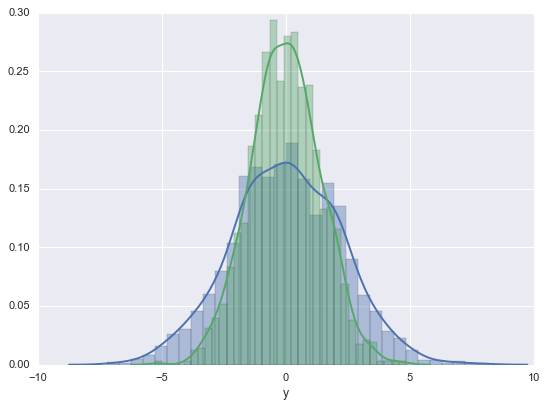

In [54]:
sns.distplot(df['x'])
sns.distplot(df['y'])
plt.ylim([0,0.3])
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:630: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


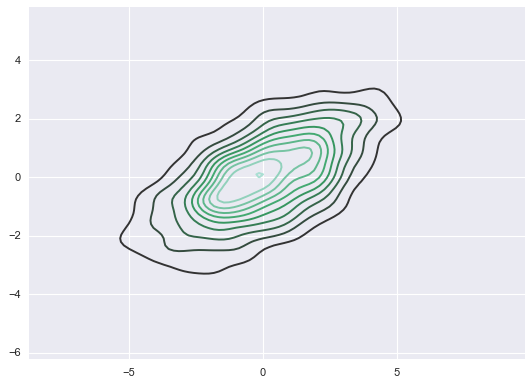

In [55]:
# 当直接传入二维数据时：
sns.kdeplot(data)
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


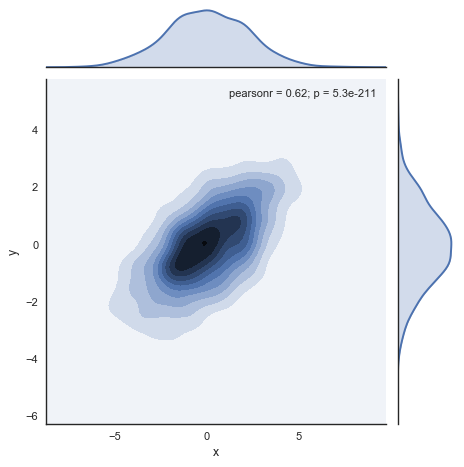

In [56]:
# 联合图
with sns.axes_style('white'):
    sns.jointplot('x','y',data = df,kind = 'kde') # 对pandas的支持异常良好 ！！
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


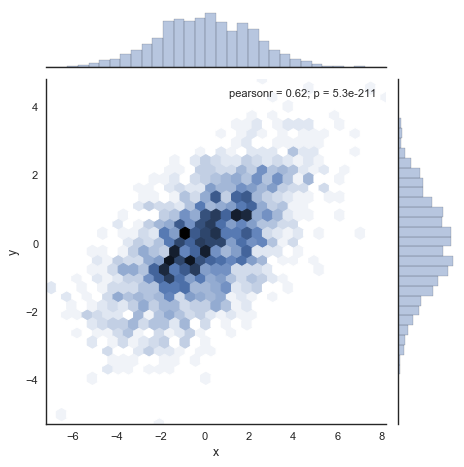

In [57]:
with sns.axes_style('white'):
    sns.jointplot('x','y',data = df,kind = 'hex') # kind参数还有很多可选
plt.show()

In [67]:
# pair plots
# iris = sns.load_dataset('iris')
# iris.head()
from sklearn import  datasets
iris = datasets.load_iris()
dff = pd.DataFrame(data = iris.data,columns = ['A','B','C','D'])
dff['species'] = iris.target
dff.head()

,A,B,C,D,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


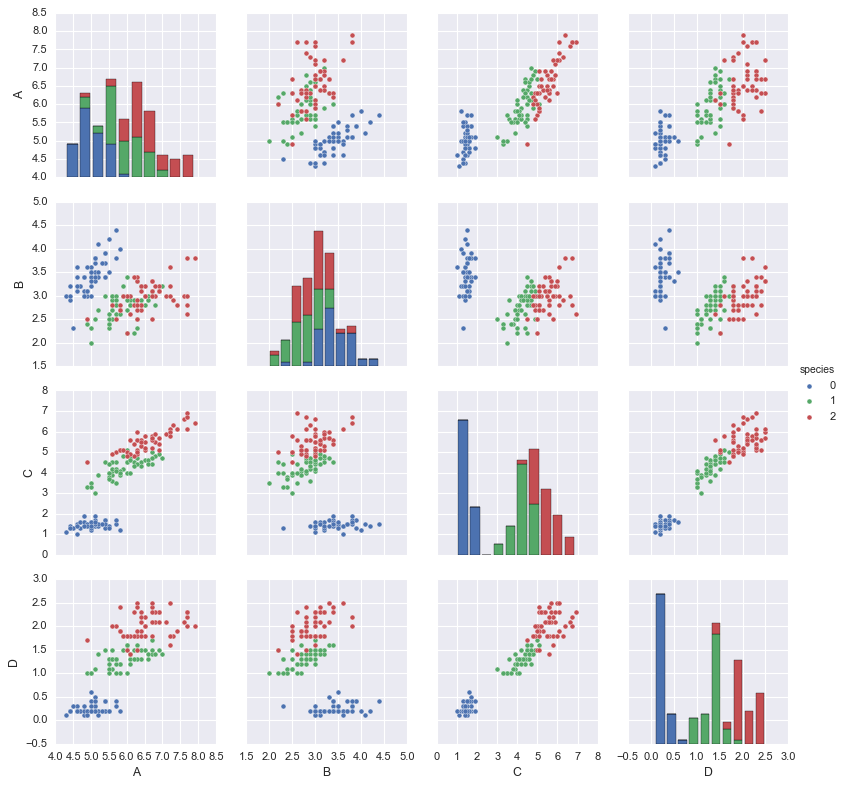

In [87]:
sns.pairplot(dff,hue = 'species',size = 2.5,vars = ['A','B','C','D'])
plt.show()

In [73]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


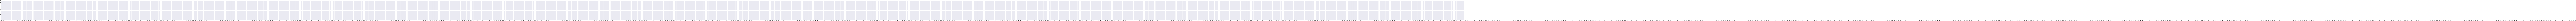

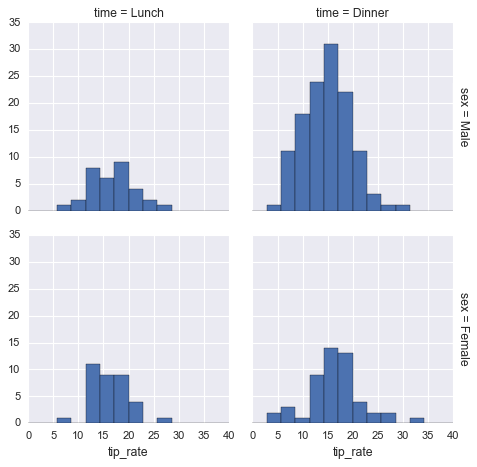

In [76]:
# Faceted Plots 我也不知道怎么翻译这个
tips['tip_rate'] = 100* tips['tip']/tips['total_bill']
grid = sns.FacetGrid(tips,row = 'sex',col = 'time',margin_titles = True)
grid.map(plt.hist,'tip_rate',bins = np.linspace(0,40,15))
plt.show()

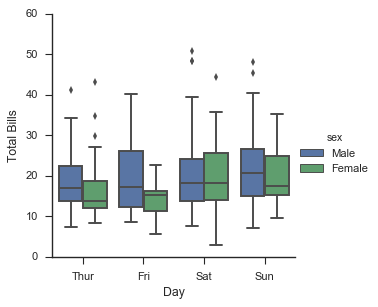

In [77]:
# Factor Plots
with sns.axes_style('ticks'):
    g = sns.factorplot(x = 'day',y = 'total_bill',hue = 'sex',data = tips,kind = 'box')
    g.set_axis_labels('Day','Total Bills')
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


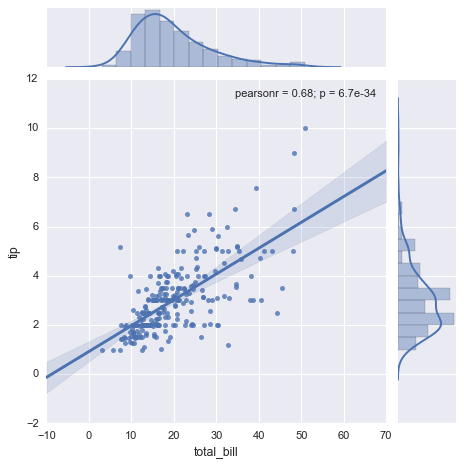

In [80]:
# 联合分布图
sns.jointplot("total_bill","tip",data = tips,kind = 'reg')
plt.show()

In [81]:
# bar plot
planet = sns.load_dataset('planets')
planet.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


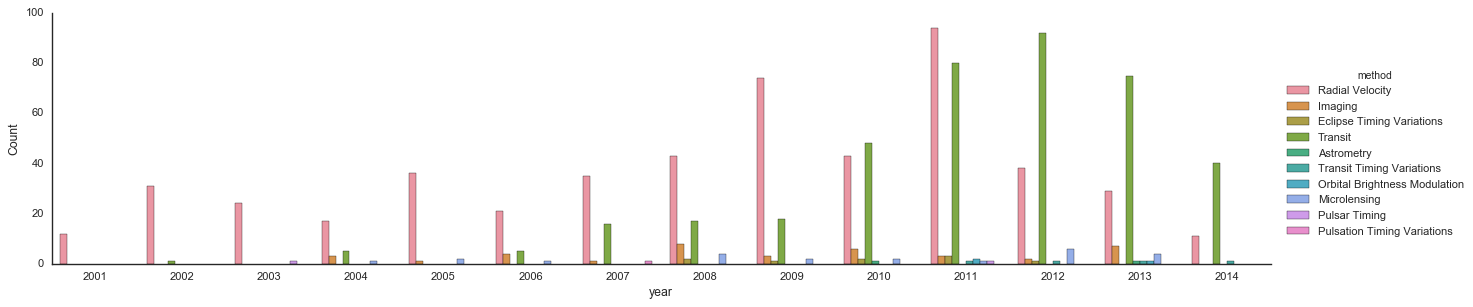

In [86]:
with sns.axes_style('white'):
    g = sns.factorplot('year',data = planet,hue = 'method',kind = 'count',aspect = 4,order = range(2001,2015))
#     参数解释：aspect规定每个统计类的长度，order规定每一块各类的排序规则
    g.set_ylabels('Count')
plt.show()

D:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


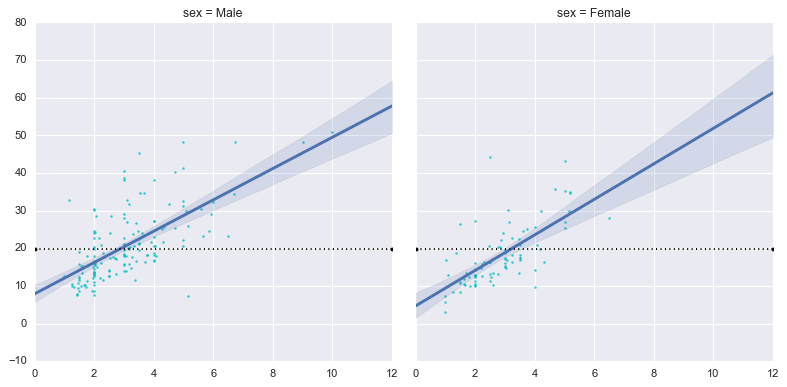

In [95]:
# 线性规划
g = sns.lmplot('tip','total_bill',col = 'sex',data = tips,markers=".", scatter_kws=dict(color='c'))
mean = tips['total_bill'].mean()
g.map(plt.axhline,y = mean,c='k',ls = ':')
plt.show()

## 结语
Python用来可视化的库越来越多。而追求可视化的最佳方案永远是Data Visualization with Python领域孜孜不倦的话题。

除了Matplotlib 这一先驱，Python可视化库的list已经很长。未来还会再增长。

> The visualization space in the Python community is very dynamic, and I fully expect
this list to be out of date as soon as it is published. Keep an eye out for what’s coming
in the future!
